DATA CREATION

You're working with a synthetic dataset from a pan-India e-commerce platform tracking revenue, orders, and returns across major states.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(26)

states = ['Maharashtra', 'Delhi', 'Karnataka', 'Tamil Nadu', 'Gujarat',
          'West Bengal', 'Rajasthan', 'Kerala', 'Telangana', 'Uttar Pradesh']

df = pd.DataFrame({
    'State': np.random.choice(states, 1000),
    'Orders': np.random.poisson(20, 1000),
    'Return_Rate': np.round(np.random.uniform(0.01, 0.3, 1000), 2),
    'Revenue': np.round(np.random.normal(5000, 800, 1000), 2)
})

df.to_csv("regional_sales_data.csv", index=False)


## Task:
1. Identify Winners and Losers:

    - Which 3 states generate the highest revenue?
    - Which 3 have the highest return rates?
    - Any states with high orders but low revenue or vice versa?

2. Make a Regional Decision:

    - Recommend:
        - 1 region to invest more in (growth opportunity)
        - 1 region to optimize or cut due to inefficiencies

3. Optional Bonus: Build a Map

    - If using Python:
        - Use plotly.express.choropleth() or folium to show regional revenue heatmap.

    - If using Power BI:
        - Create a custom shape map or filled map of India.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        1000 non-null   object 
 1   Orders       1000 non-null   int32  
 2   Return_Rate  1000 non-null   float64
 3   Revenue      1000 non-null   float64
dtypes: float64(2), int32(1), object(1)
memory usage: 27.5+ KB


In [3]:
df.head()

,State,Orders,Return_Rate,Revenue
0,West Bengal,28,0.25,4559.96
1,Rajasthan,14,0.03,4351.12
2,Maharashtra,18,0.12,4763.64
3,Delhi,14,0.02,6998.95
4,Rajasthan,15,0.18,5324.31


In [4]:
df['State'].unique()

array(['West Bengal', 'Rajasthan', 'Maharashtra', 'Delhi', 'Tamil Nadu',
       'Gujarat', 'Karnataka', 'Kerala', 'Uttar Pradesh', 'Telangana'],
      dtype=object)

In [5]:
df.groupby('State')['Revenue'].sum().sort_values(ascending=False)

State
Rajasthan        598599.55
Maharashtra      586270.66
Kerala           514884.05
Delhi            504701.80
West Bengal      499406.89
Telangana        497797.19
Karnataka        478600.79
Tamil Nadu       460685.66
Uttar Pradesh    455261.74
Gujarat          446995.14
Name: Revenue, dtype: float64

In [22]:
df.groupby('State')['Return_Rate'].mean().sort_values(ascending=False)

State
Uttar Pradesh    0.174045
Telangana        0.168911
West Bengal      0.162121
Kerala           0.161068
Maharashtra      0.160427
Rajasthan        0.159667
Delhi            0.159000
Gujarat          0.156744
Karnataka        0.149785
Tamil Nadu       0.148478
Name: Return_Rate, dtype: float64

In [7]:
grouped = df.groupby('State').agg({
    'Orders': 'sum',
    'Revenue': 'sum',
    'Return_Rate': 'mean'
}).reset_index().sort_values(by='Revenue', ascending=False)


In [8]:
grouped['Revenue_per_Order'] = grouped['Revenue'] / grouped['Orders']

grouped

,State,Orders,Revenue,Return_Rate,Revenue_per_Order
5,Rajasthan,2312,598599.55,0.159667,258.909840
4,Maharashtra,2293,586270.66,0.160427,255.678439
3,Kerala,2075,514884.05,0.161068,248.136892
0,Delhi,2010,504701.80,0.159000,251.095423
9,West Bengal,2043,499406.89,0.162121,244.447817
7,Telangana,2077,497797.19,0.168911,239.671252
2,Karnataka,1922,478600.79,0.149785,249.011857
6,Tamil Nadu,1849,460685.66,0.148478,249.153953
8,Uttar Pradesh,1822,455261.74,0.174045,249.869232
1,Gujarat,1764,446995.14,0.156744,253.398605


In [9]:
df['Orders'].describe()

count    1000.000000
mean       20.167000
std         4.582806
min         8.000000
25%        17.000000
50%        20.000000
75%        23.000000
max        38.000000
Name: Orders, dtype: float64

In [10]:
df['Revenue'].describe()

count    1000.000000
mean     5043.203470
std       774.924336
min      2607.990000
25%      4516.202500
50%      5043.380000
75%      5551.487500
max      7613.660000
Name: Revenue, dtype: float64

In [11]:
# df['Revenue'].quantile(0.75)
# min(df['Revenue'])

In [12]:
grouped

,State,Orders,Revenue,Return_Rate,Revenue_per_Order
5,Rajasthan,2312,598599.55,0.159667,258.909840
4,Maharashtra,2293,586270.66,0.160427,255.678439
3,Kerala,2075,514884.05,0.161068,248.136892
0,Delhi,2010,504701.80,0.159000,251.095423
9,West Bengal,2043,499406.89,0.162121,244.447817
7,Telangana,2077,497797.19,0.168911,239.671252
2,Karnataka,1922,478600.79,0.149785,249.011857
6,Tamil Nadu,1849,460685.66,0.148478,249.153953
8,Uttar Pradesh,1822,455261.74,0.174045,249.869232
1,Gujarat,1764,446995.14,0.156744,253.398605


In [13]:
# Flag the outliers

# high orders but low revenue
high_order_low_revenue = grouped[(grouped['Orders'] > grouped['Orders'].quantile(0.75)) & (grouped['Revenue'] < grouped['Revenue'].quantile(0.25))]

# low orders high low revenue
low_order_high_revenue = grouped[(grouped['Orders'] < grouped['Orders'].quantile(0.25)) & (grouped['Revenue'] > grouped['Revenue'].quantile(0.75))]


In [14]:
print("High Orders but Low Revenue States:")
print(high_order_low_revenue[['State', 'Orders', 'Revenue']])

print("\nLow Orders but High Revenue States:")
print(low_order_high_revenue[['State', 'Orders', 'Revenue']])


High Orders but Low Revenue States:
Empty DataFrame
Columns: [State, Orders, Revenue]
Index: []

Low Orders but High Revenue States:
Empty DataFrame
Columns: [State, Orders, Revenue]
Index: []


In [15]:
grouped['Revenue_per_Order'] = grouped['Revenue'] / grouped['Orders']

# Highest orders, lowest revenue per order
suspicious_high_orders = grouped.sort_values(by=['Orders', 'Revenue_per_Order'], ascending=[False, True])

# Lowest orders, highest revenue per order
suspicious_low_orders = grouped.sort_values(by=['Orders', 'Revenue_per_Order'], ascending=[True, False])




In [16]:
suspicious_high_orders.head(3)


,State,Orders,Revenue,Return_Rate,Revenue_per_Order
5,Rajasthan,2312,598599.55,0.159667,258.909840
4,Maharashtra,2293,586270.66,0.160427,255.678439
7,Telangana,2077,497797.19,0.168911,239.671252


In [17]:
suspicious_low_orders.head(3)

,State,Orders,Revenue,Return_Rate,Revenue_per_Order
1,Gujarat,1764,446995.14,0.156744,253.398605
8,Uttar Pradesh,1822,455261.74,0.174045,249.869232
6,Tamil Nadu,1849,460685.66,0.148478,249.153953


In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline

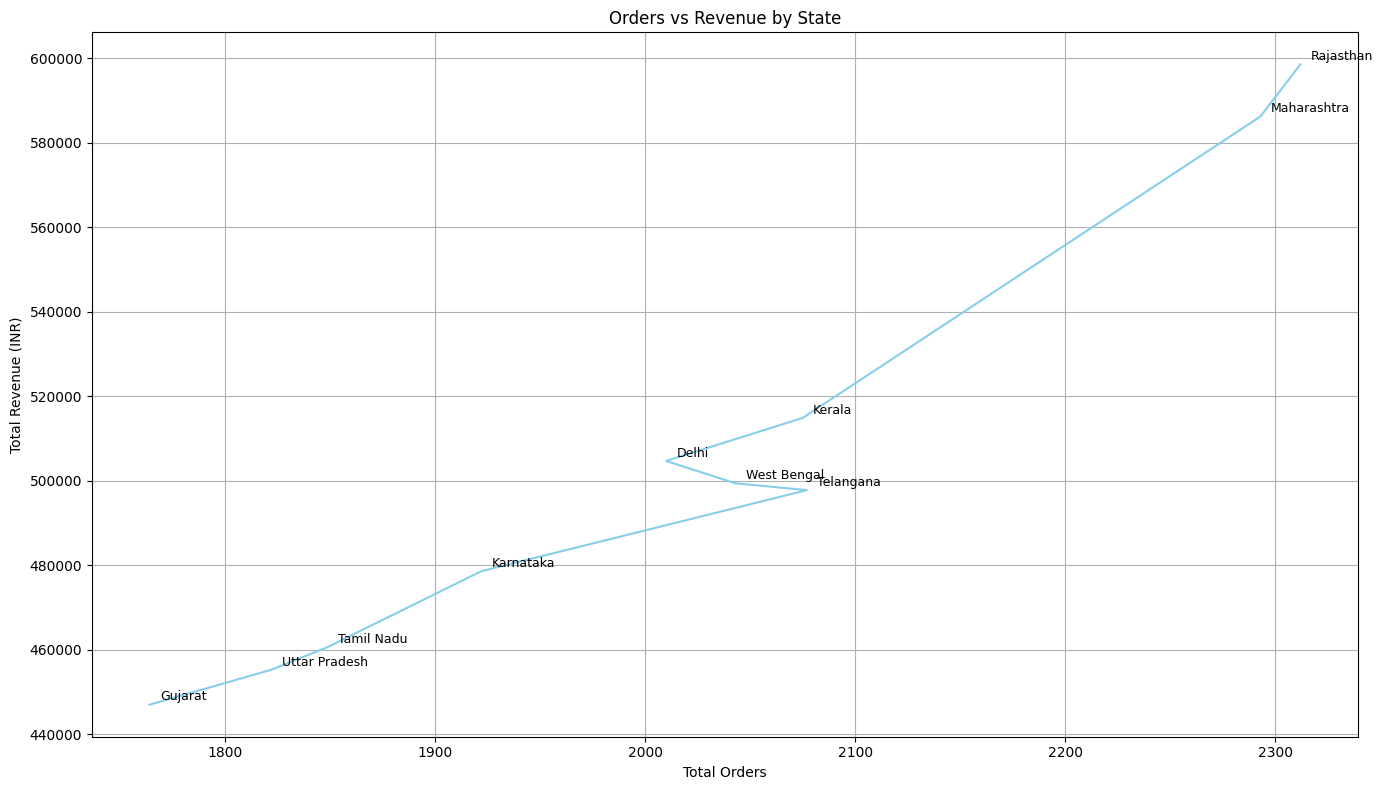

In [19]:
plt.figure(figsize=(14, 8))
plt.plot(grouped['Orders'], grouped['Revenue'], color='skyblue')
# Annotate each point with state name
for i in range(len(grouped)):
    plt.text(grouped['Orders'][i]+5, grouped['Revenue'][i]+1000, grouped['State'][i], fontsize=9)

# Plot settings
plt.title('Orders vs Revenue by State')
plt.xlabel('Total Orders')
plt.ylabel('Total Revenue (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.show()

In [24]:
grouped.to_csv('grouped.csv', index=False)